In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from IPython.display import display
import itertools, time, os, pickle, json, tempfile, sys
srcpath = os.path.abspath(os.path.join(os.path.abspath(''),  '..',  'src'))
sys.path.append(srcpath)
import seaborn as sns
from tqdm.notebook import tqdm
from scipy.interpolate import interp1d
from sklearn.linear_model import LinearRegression
from exp_utils import *
#from data_gen_full import *
%load_ext autoreload
%autoreload 2



plt.rcParams.update({
     "text.usetex" : "true",
    "font.family": "sans-serif",
    "font.serif": ["Helvetica"],
})


plt.rc('figure', dpi=150)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


```(relative, 0.05)``` implies $ R^{emp}(f_{N^*}) \approx 1 - (0.95)Acc(f^*) $ w.h.p


```(margin, 1) ``` implies  $ R^{emp}(f_{N^*}) \approx R_{1}^{emp}(f^*) $ w.h.p

In [50]:

with open('data_full_new.pkl', 'rb') as f:
    data = pickle.load(f)
    data = pd.DataFrame.from_dict(data, orient = 'index')
    data.index = pd.MultiIndex.from_tuples(data.index,  names=['kernel,dataset', 'm_train', 'm_test',
                                                               'C', 'N' ,'mode'])

#data
#data = data.sort_values(["m_train"])
#K = data.xs(("Havliscek","Generated"), level = 'kernel,dataset')['K_train'].iloc[0]
#eta_from_N(K, 2000, 0.1)
#N_from_eta(K, 0.492 )





In [51]:
acc = lambda x,y: 1 - np.mean(0.5*np.abs(x.flatten()-y.flatten()))
R_test = []
R_train = []
mode_list = []
test_acc = []
train_acc = []
for x in data.index:
  #  print(x)
    row =  data.loc[x]
    R_test.append(reliability(row["y_test_pred"], row["y_test_pred_random"]))
    R_train.append(reliability(row["y_train_pred"], row["y_train_pred_random"]))
    train_acc.append( acc(row["y_train"], row["y_train_pred"]) )
    test_acc.append( acc(row["y_test"], row["y_test_pred"]) )
data["R_train"] = R_train
data["R_test"] = R_test
data["Test Acc"] = test_acc
data["Train Acc"] = train_acc


In [52]:
data

y_train  \
kernel,dataset       m_train m_test C N     mode                                                            
(QAOA, Checkerboard) 60      60     1 10    test_train  [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
                                            test_only   [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
                                      22    test_train  [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
                                            test_only   [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
                                      47    test_train  [1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...   
...                                                                                                   ...   
(Havliscek, Gen,5)   60      60     1 2155  test_only   [1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...   
                                      4642  test_train  [1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...   
                                            test_only   [1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...   
                                      10000 test_train  [1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...   
                                            test_only   [1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -...   

                                                        C_val  m_sv  \
kernel,dataset       m_train m_test C N     mode                      
(QAOA, Checkerboard) 60      60     1 10    test_train      1    34   
                                            test_only       1    34   
                                      22    test_train      1    34   
                                            test_only       1    34   
                                      47    test_train      1    34   
...                                                       ...   ...   
(Havliscek, Gen,5)   60      60     1 2155  test_only       1    60   
                                      4642  test_train      1    60   
                                            test_only       1    60   
                                      10000 test_train      1    60   
                                            test_only       1    60   

                                                                                                  K_train  \
kernel,dataset       m_train m_test C N     mode                                                            
(QAOA, Checkerboard) 60      60     1 10    test_train  [[1.0, 0.47128616194714235, 0.9622342223952945...   
                                            test_only   [[1.0, 0.47128616194714235, 0.9622342223952945...   
                                      22    test_train  [[1.0, 0.47128616194714235, 0.9622342223952945...   
                                            test_only   [[1.0, 0.47128616194714235, 0.9622342223952945...   
                                      47    test_train  [[1.0, 0.47128616194714235, 0.9622342223952945...   
...                                                                                                   ...   
(Havliscek, Gen,5)   60      60     1 2155  test_only   [[1.0, 0.012233239335688506, 0.002097167972381...   
                                      4642  test_train  [[1.0, 0.012233239335688506, 0.002097167972381...   
                                            test_only   [[1.0, 0.012233239335688506, 0.002097167972381...   
                                      10000 test_train  [[1.0, 0.012233239335688506, 0.002097167972381...   
                                            test_only   [[1.0, 0.012233239335688506, 0.002097167972381...   

                                                                                                   y_test  \
kernel,dataset       m_train m_test C N     mode                                                            
(QAOA, Checkerboard) 60      60     1 10    test_train  [-1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, ...   
           

/tmp/ipykernel_12394/3063267304.py:22: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df = data.xs([key],level='kernel,dataset' ).reset_index()
/home/abhijith/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


    m_train  m_test  C      N        mode  \
0        60      60  1     10  test_train   
1        60      60  1     10   test_only   
2        60      60  1     22  test_train   
3        60      60  1     22   test_only   
4        60      60  1     47  test_train   
5        60      60  1     47   test_only   
6        60      60  1    100  test_train   
7        60      60  1    100   test_only   
8        60      60  1    216  test_train   
9        60      60  1    216   test_only   
10       60      60  1    465  test_train   
11       60      60  1    465   test_only   
12       60      60  1   1000  test_train   
13       60      60  1   1000   test_only   
14       60      60  1   2155  test_train   
15       60      60  1   2155   test_only   
16       60      60  1   4642  test_train   
17       60      60  1   4642   test_only   
18       60      60  1  10000  test_train   
19       60      60  1  10000   test_only   

                                              y_train 

/tmp/ipykernel_12394/3063267304.py:22: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df = data.xs([key],level='kernel,dataset' ).reset_index()
/home/abhijith/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


    m_train  m_test  C      N        mode  \
0        60      60  1     10  test_train   
1        60      60  1     10   test_only   
2        60      60  1     22  test_train   
3        60      60  1     22   test_only   
4        60      60  1     47  test_train   
5        60      60  1     47   test_only   
6        60      60  1    100  test_train   
7        60      60  1    100   test_only   
8        60      60  1    216  test_train   
9        60      60  1    216   test_only   
10       60      60  1    465  test_train   
11       60      60  1    465   test_only   
12       60      60  1   1000  test_train   
13       60      60  1   1000   test_only   
14       60      60  1   2155  test_train   
15       60      60  1   2155   test_only   
16       60      60  1   4642  test_train   
17       60      60  1   4642   test_only   
18       60      60  1  10000  test_train   
19       60      60  1  10000   test_only   

                                              y_train 

/tmp/ipykernel_12394/3063267304.py:22: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df = data.xs([key],level='kernel,dataset' ).reset_index()
/home/abhijith/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


    m_train  m_test  C      N        mode  \
0        60      60  1     10  test_train   
1        60      60  1     10   test_only   
2        60      60  1     22  test_train   
3        60      60  1     22   test_only   
4        60      60  1     47  test_train   
5        60      60  1     47   test_only   
6        60      60  1    100  test_train   
7        60      60  1    100   test_only   
8        60      60  1    216  test_train   
9        60      60  1    216   test_only   
10       60      60  1    465  test_train   
11       60      60  1    465   test_only   
12       60      60  1   1000  test_train   
13       60      60  1   1000   test_only   
14       60      60  1   2155  test_train   
15       60      60  1   2155   test_only   
16       60      60  1   4642  test_train   
17       60      60  1   4642   test_only   
18       60      60  1  10000  test_train   
19       60      60  1  10000   test_only   

                                              y_train 

/tmp/ipykernel_12394/3063267304.py:22: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df = data.xs([key],level='kernel,dataset' ).reset_index()
/home/abhijith/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


    m_train  m_test  C      N        mode  \
0        60      60  1     10  test_train   
1        60      60  1     10   test_only   
2        60      60  1     22  test_train   
3        60      60  1     22   test_only   
4        60      60  1     47  test_train   
5        60      60  1     47   test_only   
6        60      60  1    100  test_train   
7        60      60  1    100   test_only   
8        60      60  1    216  test_train   
9        60      60  1    216   test_only   
10       60      60  1    465  test_train   
11       60      60  1    465   test_only   
12       60      60  1   1000  test_train   
13       60      60  1   1000   test_only   
14       60      60  1   2155  test_train   
15       60      60  1   2155   test_only   
16       60      60  1   4642  test_train   
17       60      60  1   4642   test_only   
18       60      60  1  10000  test_train   
19       60      60  1  10000   test_only   

                                              y_train 

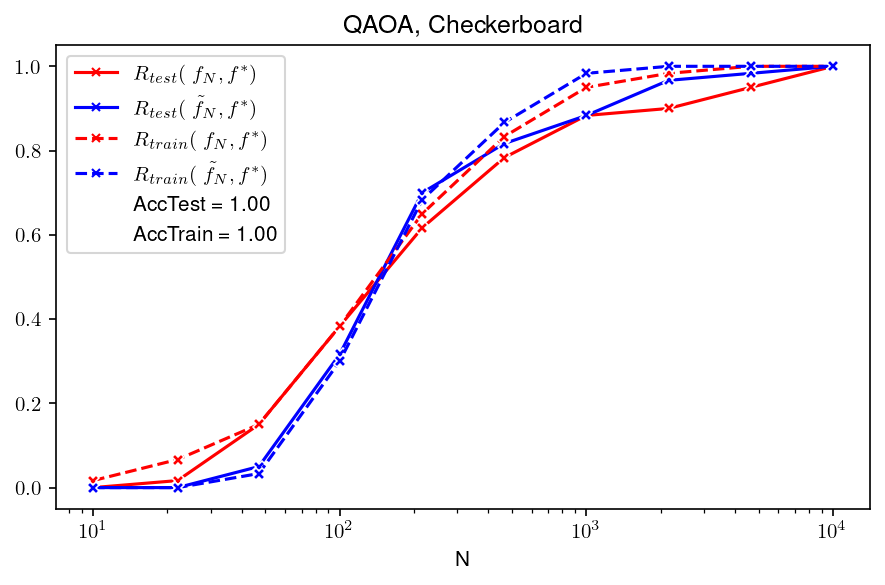

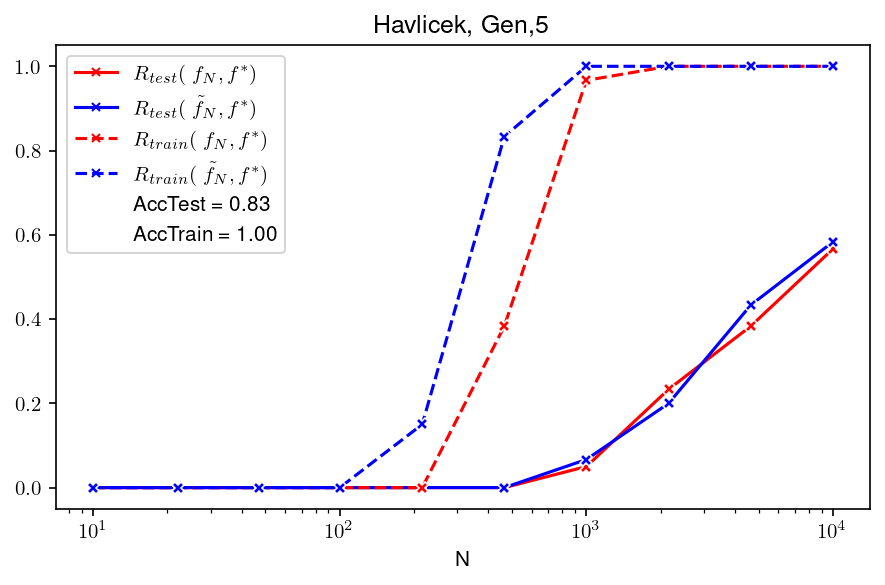

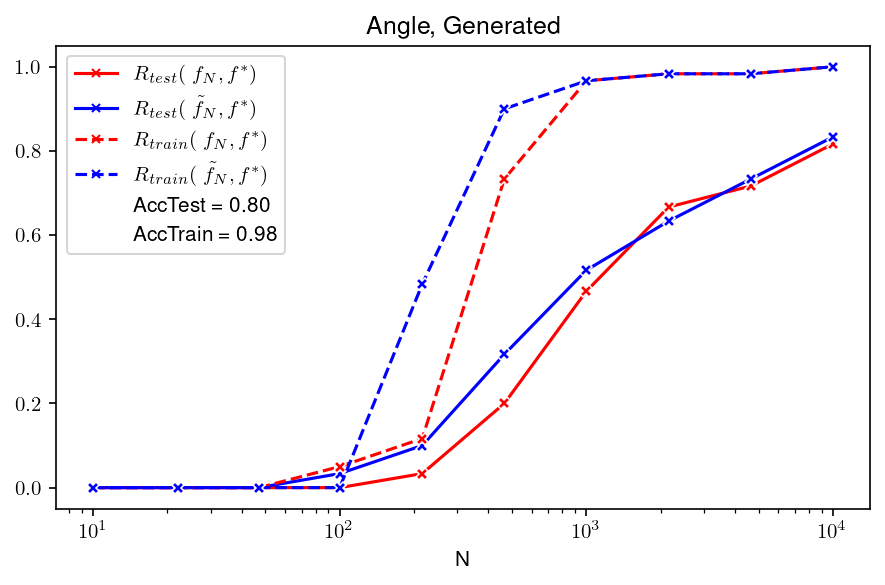

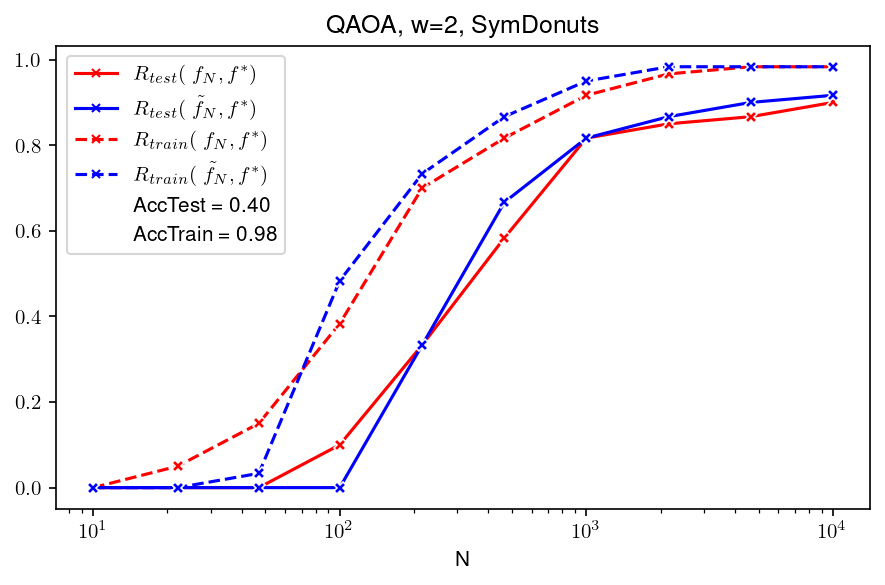

In [53]:
import matplotlib.lines as mlines
key_list = data.index.get_level_values("kernel,dataset").unique()
key = ('QAOA,2', 'SymDonuts')

colors = ["#FF0000", "#0000FF"]
sns.set_palette(sns.color_palette(colors))


#df.index.get_level_values("m_train").unique()
#names = data.index.names[1:]

def legend_mapper(x):
    if x == "test_train":
        return "$f_N$"
    if x == "test_only":
        return "$\\tilde{f}_N$"
    


def plot_key(key,ax):
    #print(data.columns)
    df = data.xs([key],level='kernel,dataset' ).reset_index()
    print(df)
    
    testacc = df["Test Acc"][0]
    trainacc = df["Train Acc"][0]
    df["mode"] = df["mode"].map(legend_mapper)
    sns.lineplot(data=df.rename({"R_test":"$R_{test}$"}, axis = 1), x = "N", y="$R_{test}$", 
             hue = "mode", marker = "X" ,markersize = 6,ax = ax)
    sns.lineplot(data=df.rename({"R_train":"$R_{train}$"}, axis = 1), x = "N", y="$R_{train}$", 
             hue = "mode", marker = "X" , markersize = 6, ax= ax, linestyle="--")
   
    L = ax.legend()
   # return L

    L_test =  [mlines.Line2D([], [], color= L.get_lines()[i].get_color(), marker='x', linestyle='-',
                          markersize=4, label= "$R_{test}($ " +  L.get_texts()[i].get_text() + "$, f^*)$")  for i in range(2)]

    L_train =  [mlines.Line2D([], [], color= L.get_lines()[i].get_color(), marker='x', linestyle='--',
                          markersize=4, label="$R_{train}($  " +L.get_texts()[i].get_text() + "$, f^*)$") for i in range(2,4)]
    
    L_testacc =  [mlines.Line2D([], [], color= L.get_lines()[i].get_color(), marker='', linestyle=' ',
                          markersize=5, label=f"AccTest = {testacc:.2f} " ) ] 
    L_trainacc =  [mlines.Line2D([], [], color= L.get_lines()[i].get_color(), marker='', linestyle=' ',
                          markersize=5, label=f"AccTrain = {trainacc:.2f} " ) ] 
    
    ax.legend( handles = L_test + L_train +  L_testacc + L_trainacc)
    ax.set_xscale("log")
    ax.set_ylabel("")
    kernel_key = key[0].replace("Havliscek",  "Havlicek")
    a = kernel_key.split(",")
    if len(a) == 2:
        a[0] =  a[0] + ", w=" + a[1] 
    ax.set_title(a[0].replace("_"," ") + ", " + key[1].replace("_"," ") )
    return a[0].replace("_"," ") + ", " + key[1].replace("_"," ")
    #plt.show()


selected_keylist = [('QAOA', 'Checkerboard'), ('Havliscek', 'Gen,5'),  ('Angle', 'Generated'), ('QAOA,2', 'SymDonuts') ]
for i,k in enumerate(selected_keylist):
    fig, ax = plt.subplots(1,1, figsize=(6, 4))
    file_str = plot_key(k, ax)
    plt.tight_layout()
    fig.savefig( (file_str + "_ps.pdf").replace(" ","_"))

/tmp/ipykernel_12394/2887964187.py:22: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df = data.xs([key],level='kernel,dataset' ).reset_index()
/home/abhijith/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


    m_train  m_test  C      N        mode  \
0        60      60  1     10  test_train   
1        60      60  1     10   test_only   
2        60      60  1     22  test_train   
3        60      60  1     22   test_only   
4        60      60  1     47  test_train   
5        60      60  1     47   test_only   
6        60      60  1    100  test_train   
7        60      60  1    100   test_only   
8        60      60  1    216  test_train   
9        60      60  1    216   test_only   
10       60      60  1    465  test_train   
11       60      60  1    465   test_only   
12       60      60  1   1000  test_train   
13       60      60  1   1000   test_only   
14       60      60  1   2155  test_train   
15       60      60  1   2155   test_only   
16       60      60  1   4642  test_train   
17       60      60  1   4642   test_only   
18       60      60  1  10000  test_train   
19       60      60  1  10000   test_only   

                                              y_train 

/tmp/ipykernel_12394/2887964187.py:22: FutureWarning: Passing lists as key for xs is deprecated and will be removed in a future version. Pass key as a tuple instead.
  df = data.xs([key],level='kernel,dataset' ).reset_index()
/home/abhijith/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3169: PerformanceWarning: indexing past lexsort depth may impact performance.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


    m_train  m_test  C      N        mode  \
0        60      60  1     10  test_train   
1        60      60  1     10   test_only   
2        60      60  1     22  test_train   
3        60      60  1     22   test_only   
4        60      60  1     47  test_train   
5        60      60  1     47   test_only   
6        60      60  1    100  test_train   
7        60      60  1    100   test_only   
8        60      60  1    216  test_train   
9        60      60  1    216   test_only   
10       60      60  1    465  test_train   
11       60      60  1    465   test_only   
12       60      60  1   1000  test_train   
13       60      60  1   1000   test_only   
14       60      60  1   2155  test_train   
15       60      60  1   2155   test_only   
16       60      60  1   4642  test_train   
17       60      60  1   4642   test_only   
18       60      60  1  10000  test_train   
19       60      60  1  10000   test_only   

                                              y_train 

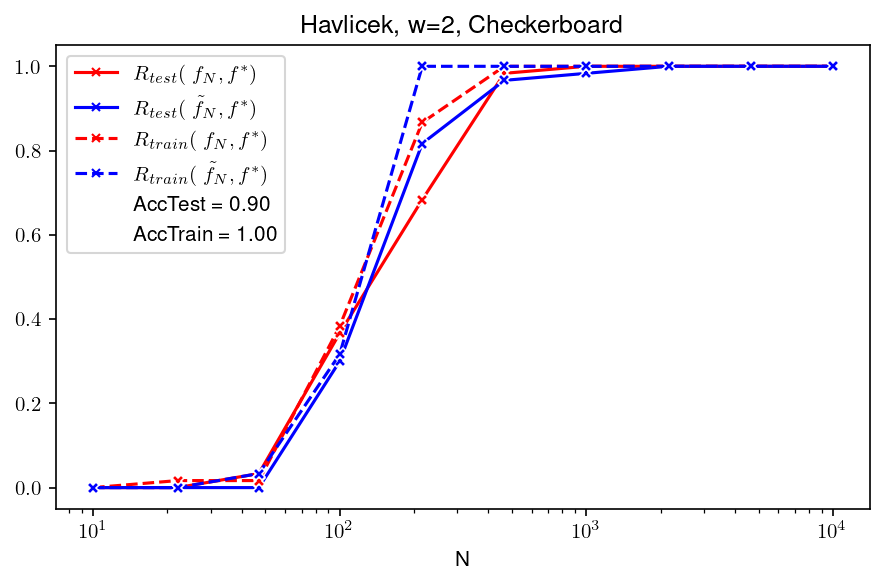

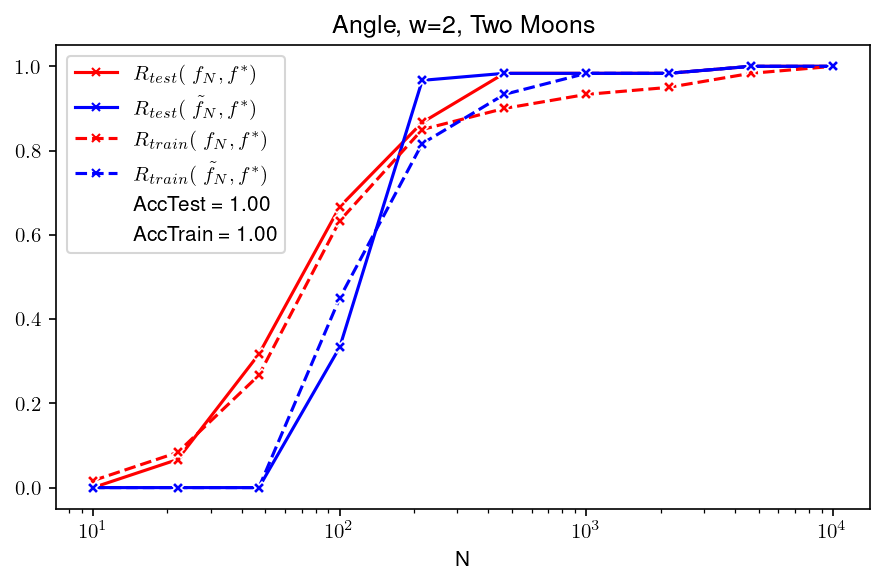

In [48]:
selected_keylist = [ ('Havliscek,2', 'Checkerboard'),('Angle,2', 'Two_Moons')]
for i,k in enumerate(selected_keylist):
    fig, ax = plt.subplots(1,1, figsize=(6, 4))
    file_str = plot_key(k, ax)
    plt.tight_layout()
    plt.savefig( (file_str + "_ps.pdf").replace(" ","_"))
    